In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

In [2]:
# Colors for all methods.
color_map = mpl.cm.get_cmap("bone")
color_norm = Normalize(vmin=-0.2, vmax=1.3, clip=True)
correct_color = color_map(color_norm(0))
wrong_color = color_map(color_norm(1))

In [3]:
# Framing probability.
def framing_probability(positive_probability):
    # Framing.
    fig, ax = plt.subplots(figsize=(4, 4), dpi=200)

    # Set limits.
    ax.set_xlim([0, 10])
    ax.set_ylim([0, 10])

    # Set and hide ticks.
    ax.set_xticks(range(0, 10))
    ax.set_yticks(range(0, 10))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.xaxis.set_ticks_position("none")
    ax.yaxis.set_ticks_position("none")
    ax.set_frame_on(False)

    # Grid.
    ax.grid(True, which="major", axis="both", color="w", linewidth=2)

    # Generating image data.
    num_positive = int(np.floor(100 * positive_probability))
    num_negative = int(100 - num_positive)
    prob_img = [0] * num_positive + [1] * num_negative
    np.random.shuffle(prob_img)
    prob_img = np.array(prob_img).reshape(10, 10)
    values = [0, 1]

    # Show. 
    extent = (0, 10, 0, 10)
#     im = ax.imshow(prob_img, extent=extent, cmap="bone", vmin=-0.2, vmax=1.3, interpolation="none")
    im = ax.imshow(prob_img, extent=extent, cmap="bone", norm=color_norm, interpolation="none")

    # Add legend.
    labels = ["Correct", "Wrong"]
    # labels = ["Wrong", "Correct"]
#     colors = [im.cmap(im.norm(value)) for value in values]
    colors = [color_map(color_norm(value)) for value in values]
    patches = [mpatches.Patch(color=colors[i], label=labels[i]) for i in range(len(values))]
    ax.legend(ncol=2, handles=patches, bbox_to_anchor=(1, -0.12), loc="lower right", borderaxespad=0., fontsize="large", fancybox=False, edgecolor="black")
    
    return fig, ax

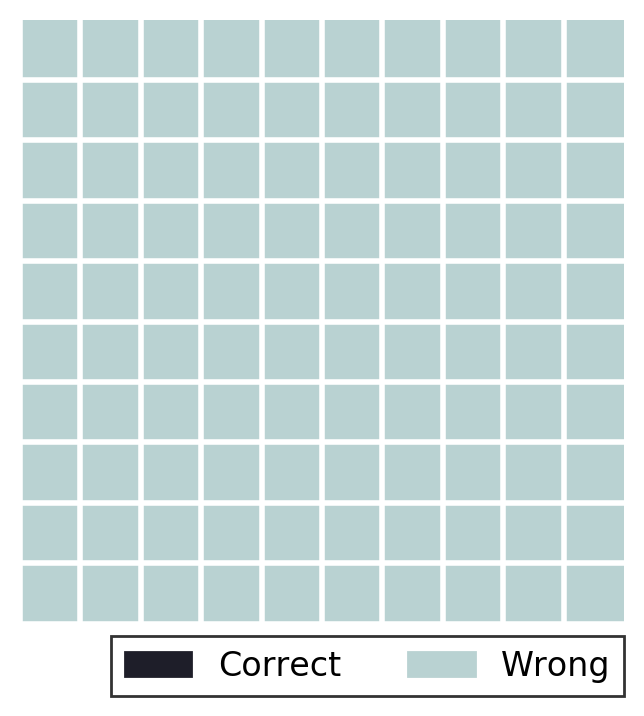

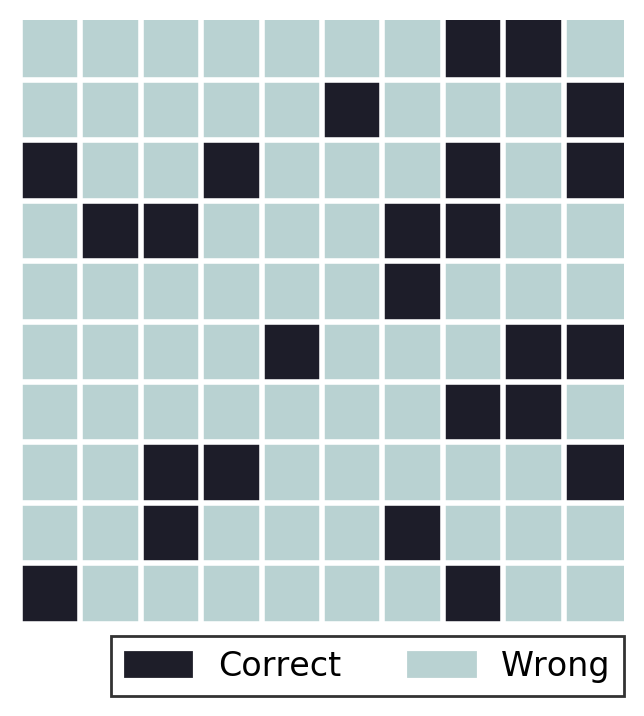

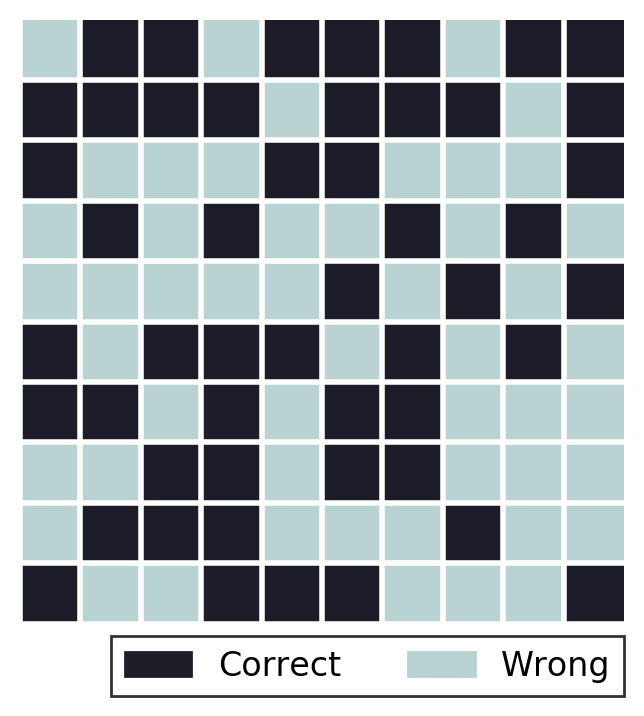

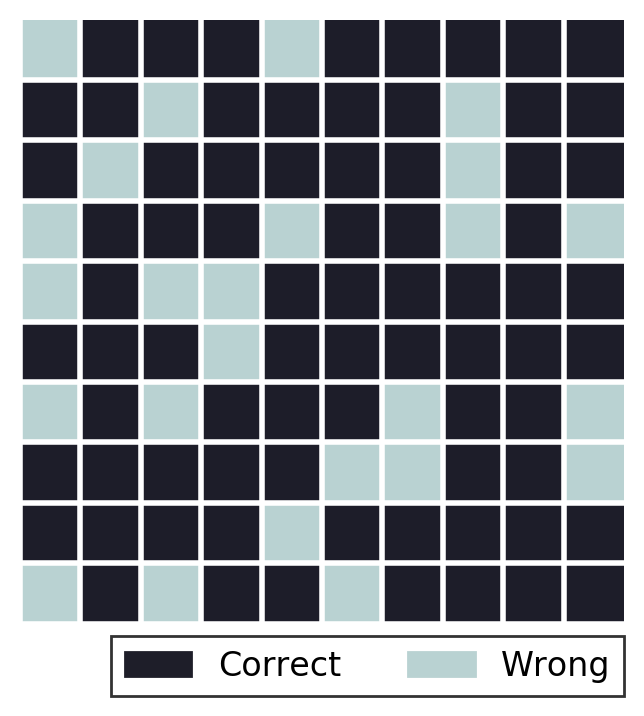

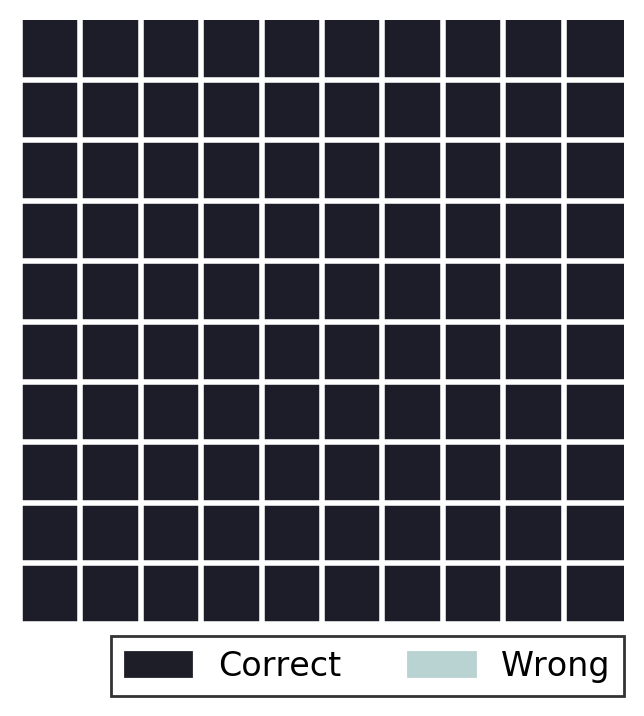

In [4]:
for prob in [0.0, 0.25, 0.50, 0.75, 1.0]:
    fig, ax = framing_probability(prob)
    fig.savefig("framing_{:.2f}.png".format(prob), bbox_inches ="tight")

In [7]:
# Scaling probability.
def scaling_probability(probability):
    # Stacked Bar chart.
    fig, ax = plt.subplots(figsize=(5, 0.5), dpi=400)
    bars = []

    # Set limits.
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])

    # Set ticks.
#     x_tick_numbers = np.arange(0, 1.0+1e-3, 0.2)
    ax.set_xticks([])
#     ax.set_xticklabels(["{:2.0f}%".format(prob * 100) for prob in x_tick_numbers])
    ax.set_yticks([])

    # Correct bar.
    ax.barh(0, width=probability, height=1.0, left=0, align="edge", color=correct_color, label="Correct")
    # ax.text(probability / 2, 0.5, "Correct", color="white", ha="center", va="center", fontsize="xx-large")

    # Wrong bar.
    ax.barh(0, width=1.0-probability, height=1.0, left=probability, align="edge", color=wrong_color, label="Wrong")

    # Legend.
    lgd = ax.legend(ncol=2, bbox_to_anchor=(1, -1.5), loc="lower right", borderaxespad=0., fontsize="large", fancybox=False, edgecolor="black")
    
    return fig, ax

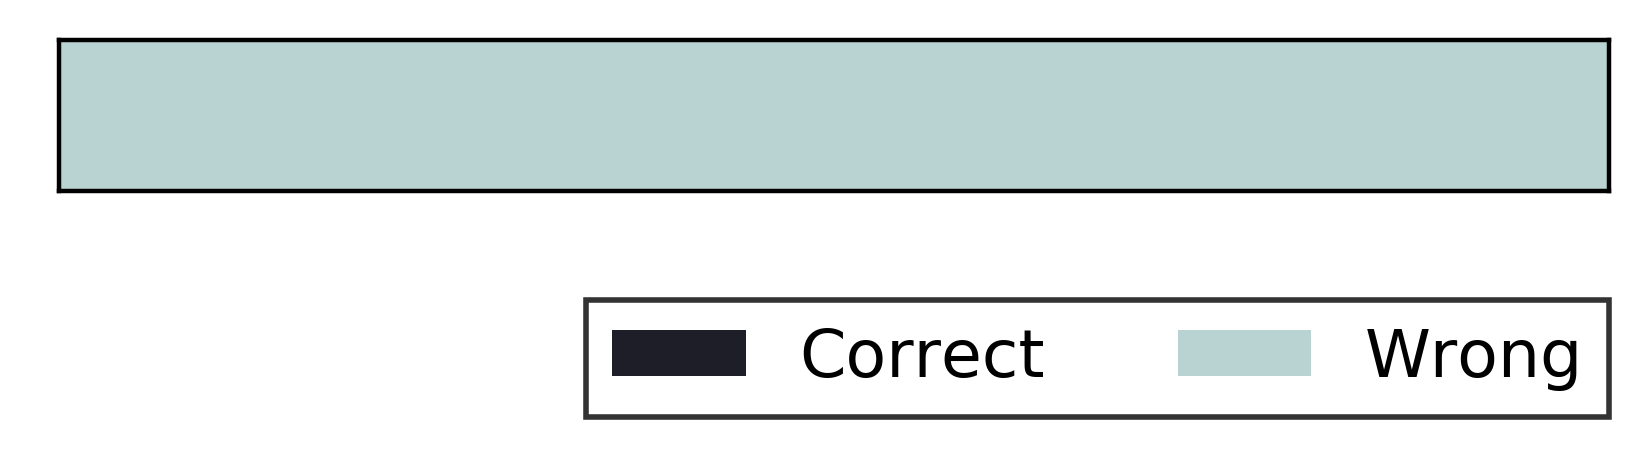

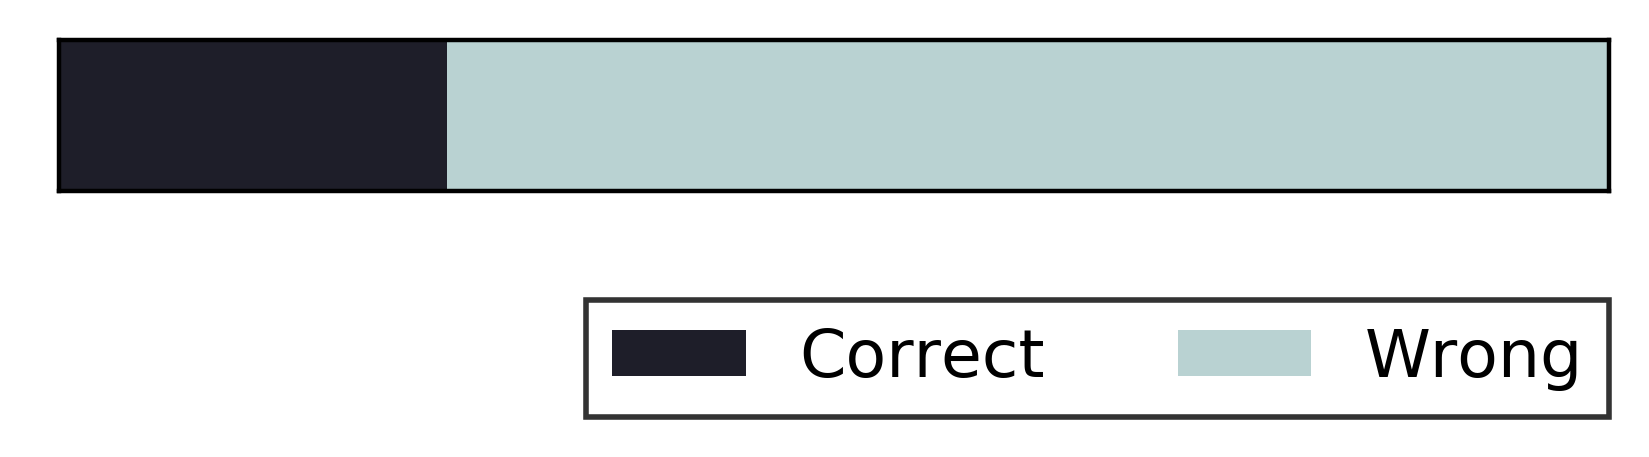

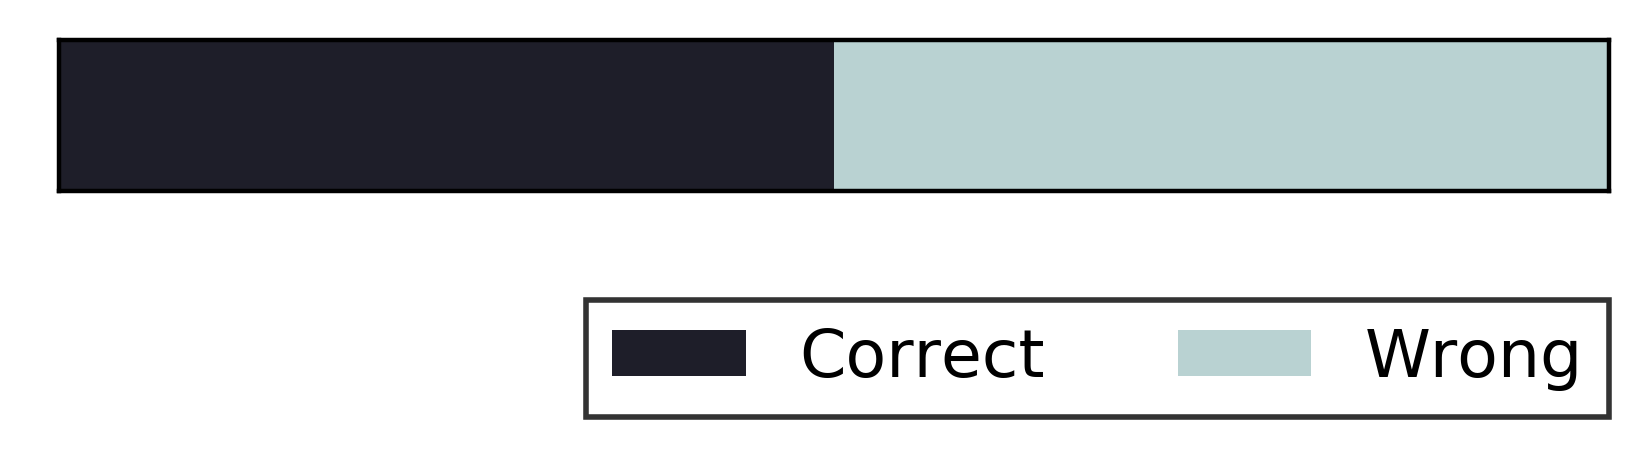

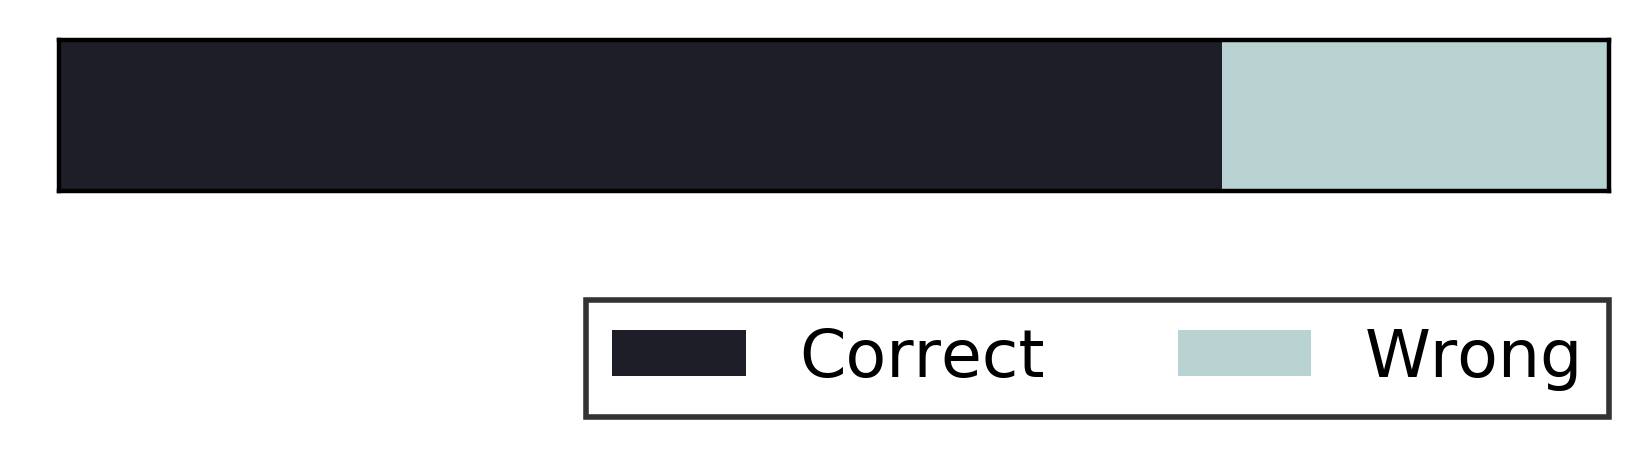

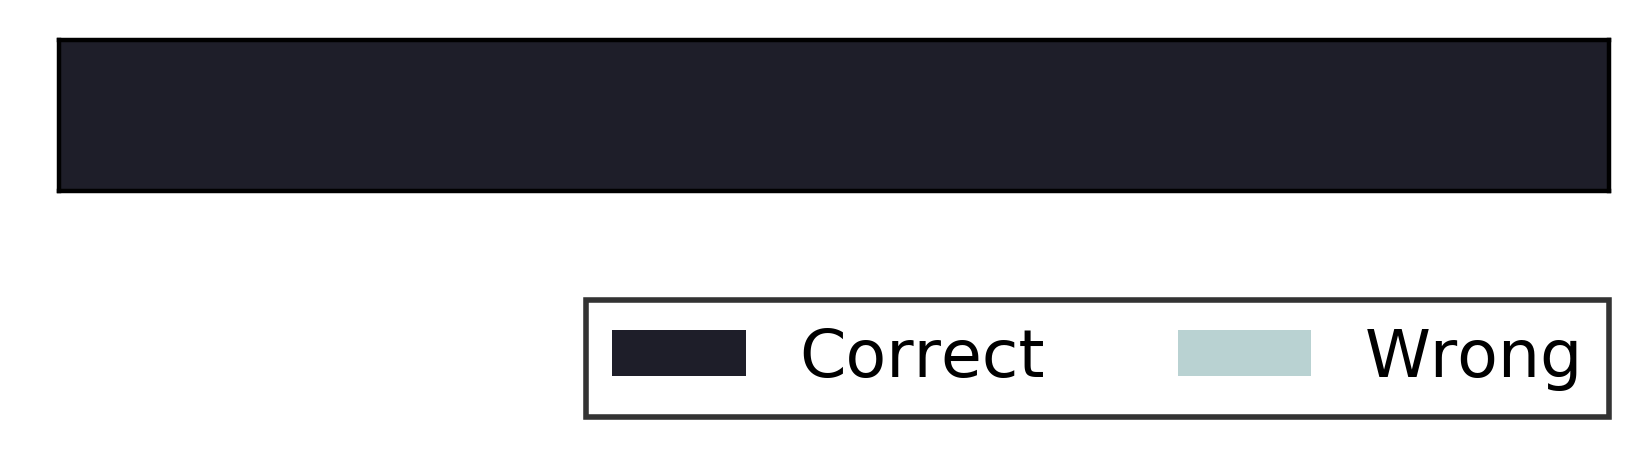

In [8]:
for prob in [0.0, 0.25, 0.50, 0.75, 1.0]:
    fig, ax = scaling_probability(prob)
    fig.savefig("scaling_{:.2f}.png".format(prob), bbox_inches ="tight")